# Analysis of the Physical Activity Patterns for Subjects in three Groups
Among the 183 subjects, we classified them into three categories based on their daily average steps:
* Inactive: daily average about 1 step.
* Moderately Active: daily average about 4 steps.
* Highly Active: daily average between 7-9 steps

In this notebook, we analyze the activity patterns for subjects in theree groups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9
import datetime as datetime
from dateutil.parser import parse

## Load and Parse the data into Time Series
The individual subjects data have been extracted and stored in a separated folder.

In [2]:
dateparse = lambda d: parse(d)
dflow = pd.read_csv("patients_data/analyses/low1.csv", parse_dates = \
                 ['Datetime'], index_col = "Datetime", date_parser=dateparse)

In [3]:
dateparse = lambda d: parse(d)
dfmedium = pd.read_csv("patients_data/analyses/medium1.csv", parse_dates = \
                 ['Datetime'], index_col = "Datetime", date_parser=dateparse)

In [4]:
dateparse = lambda d: parse(d)
dfhigh = pd.read_csv("patients_data/analyses/high1.csv", parse_dates = \
                 ['Datetime'], index_col = "Datetime", date_parser=dateparse)

### What are the unique dates in this subject's timeline? 

In [5]:
np.unique(dflow.index.date)

array([datetime.date(2016, 6, 22), datetime.date(2016, 6, 23),
       datetime.date(2016, 6, 24), datetime.date(2016, 6, 25),
       datetime.date(2016, 6, 26), datetime.date(2016, 6, 27),
       datetime.date(2016, 6, 28), datetime.date(2016, 6, 29),
       datetime.date(2016, 6, 30), datetime.date(2016, 7, 1),
       datetime.date(2016, 7, 2), datetime.date(2016, 7, 3),
       datetime.date(2016, 7, 4), datetime.date(2016, 7, 5),
       datetime.date(2016, 7, 6), datetime.date(2016, 7, 7),
       datetime.date(2016, 7, 8), datetime.date(2016, 7, 9),
       datetime.date(2016, 7, 10), datetime.date(2016, 7, 11),
       datetime.date(2016, 7, 12), datetime.date(2016, 7, 13),
       datetime.date(2016, 7, 14)], dtype=object)

In [6]:
np.unique(dfmedium.index.date)

array([datetime.date(2016, 6, 21), datetime.date(2016, 6, 22),
       datetime.date(2016, 6, 23), datetime.date(2016, 6, 24),
       datetime.date(2016, 6, 25), datetime.date(2016, 6, 26),
       datetime.date(2016, 6, 27), datetime.date(2016, 6, 28),
       datetime.date(2016, 6, 29), datetime.date(2016, 6, 30),
       datetime.date(2016, 7, 1), datetime.date(2016, 7, 2),
       datetime.date(2016, 7, 3), datetime.date(2016, 7, 4),
       datetime.date(2016, 7, 5), datetime.date(2016, 7, 6),
       datetime.date(2016, 7, 7), datetime.date(2016, 7, 8),
       datetime.date(2016, 7, 9), datetime.date(2016, 7, 10),
       datetime.date(2016, 7, 11), datetime.date(2016, 7, 12),
       datetime.date(2016, 7, 13)], dtype=object)

In [7]:
np.unique(dfhigh.index.date)

array([datetime.date(2016, 3, 29), datetime.date(2016, 3, 30),
       datetime.date(2016, 3, 31), datetime.date(2016, 4, 1),
       datetime.date(2016, 4, 2), datetime.date(2016, 4, 3),
       datetime.date(2016, 4, 4), datetime.date(2016, 4, 5),
       datetime.date(2016, 4, 6), datetime.date(2016, 4, 7),
       datetime.date(2016, 4, 8), datetime.date(2016, 4, 9),
       datetime.date(2016, 4, 10), datetime.date(2016, 4, 11),
       datetime.date(2016, 4, 12), datetime.date(2016, 4, 13),
       datetime.date(2016, 4, 14), datetime.date(2016, 4, 15),
       datetime.date(2016, 4, 16), datetime.date(2016, 4, 17),
       datetime.date(2016, 4, 18), datetime.date(2016, 4, 19),
       datetime.date(2016, 4, 20), datetime.date(2016, 4, 21)],
      dtype=object)

### How many records in total for this patient?

In [8]:
dflow = dflow.iloc[:, 2:]
dflow.shape

(31740, 15)

In [9]:
dfmedium = dfmedium.iloc[:, 2:]
dfmedium.shape

(32013, 15)

In [10]:
dfhigh = dfhigh.iloc[:, 2:]
dfhigh.shape

(33205, 15)

### Take a look at the data in several sample records:

In [11]:
dflow.sample(5)

,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,
2016-07-03 00:22:00,07/03/2016,12.0,2.0,0:22:00,0,22,0,NaN,0,0,0,0.000000,0.000000,True,1
2016-06-25 16:36:00,06/25/2016,4.0,1.0,16:36:00,16,36,0,NaN,898,552,568,1.406433,1197.385485,True,1
2016-06-28 10:37:00,06/28/2016,7.0,1.0,10:37:00,10,37,0,NaN,2294,980,2476,5.742214,3514.742096,True,2
2016-07-08 04:52:00,07/08/2016,17.0,3.0,4:52:00,4,52,0,NaN,0,0,0,0.000000,0.000000,True,1
2016-07-10 01:10:00,07/10/2016,19.0,3.0,1:10:00,1,10,0,NaN,0,0,0,0.000000,0.000000,True,1


In [12]:
dfmedium.sample(5)

,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,
2016-07-08 10:09:00,07/08/2016,18.0,3.0,10:09:00,10,9,0,NaN,4102,2488,2163,3.709825,5262.615034,True,1
2016-07-13 13:06:00,07/13/2016,23.0,NaN,13:06:00,13,6,0,NaN,0,0,0,0.000000,0.000000,True,1
2016-07-08 19:01:00,07/08/2016,18.0,3.0,19:01:00,19,1,0,NaN,0,0,0,0.000000,0.000000,True,1
2016-07-03 06:34:00,07/03/2016,13.0,2.0,6:34:00,6,34,0,NaN,1385,1812,3472,3.297322,4154.076672,True,1
2016-07-04 08:17:00,07/04/2016,14.0,2.0,8:17:00,8,17,0,NaN,0,0,0,0.000000,0.000000,True,1


In [13]:
dfhigh.sample(5)

,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,
2016-04-12 12:05:00,04/12/2016,15.0,3.0,12:05:00,12,5,2,0.0,714,504,697,0.651699,1117.864482,True,1
2016-03-31 21:16:00,03/31/2016,3.0,1.0,21:16:00,21,16,1,0.0,765,730,737,0.774447,1288.911944,True,1
2016-04-09 19:23:00,04/09/2016,12.0,2.0,19:23:00,19,23,0,0.0,1097,688,635,1.573507,1442.212883,True,1
2016-04-01 01:13:00,04/01/2016,4.0,1.0,1:13:00,1,13,0,0.0,333,320,268,0.249865,533.959736,True,1
2016-04-20 22:59:00,04/20/2016,23.0,NaN,22:59:00,22,59,0,0.0,0,0,0,0.000000,0.000000,False,3


## Minute Steps

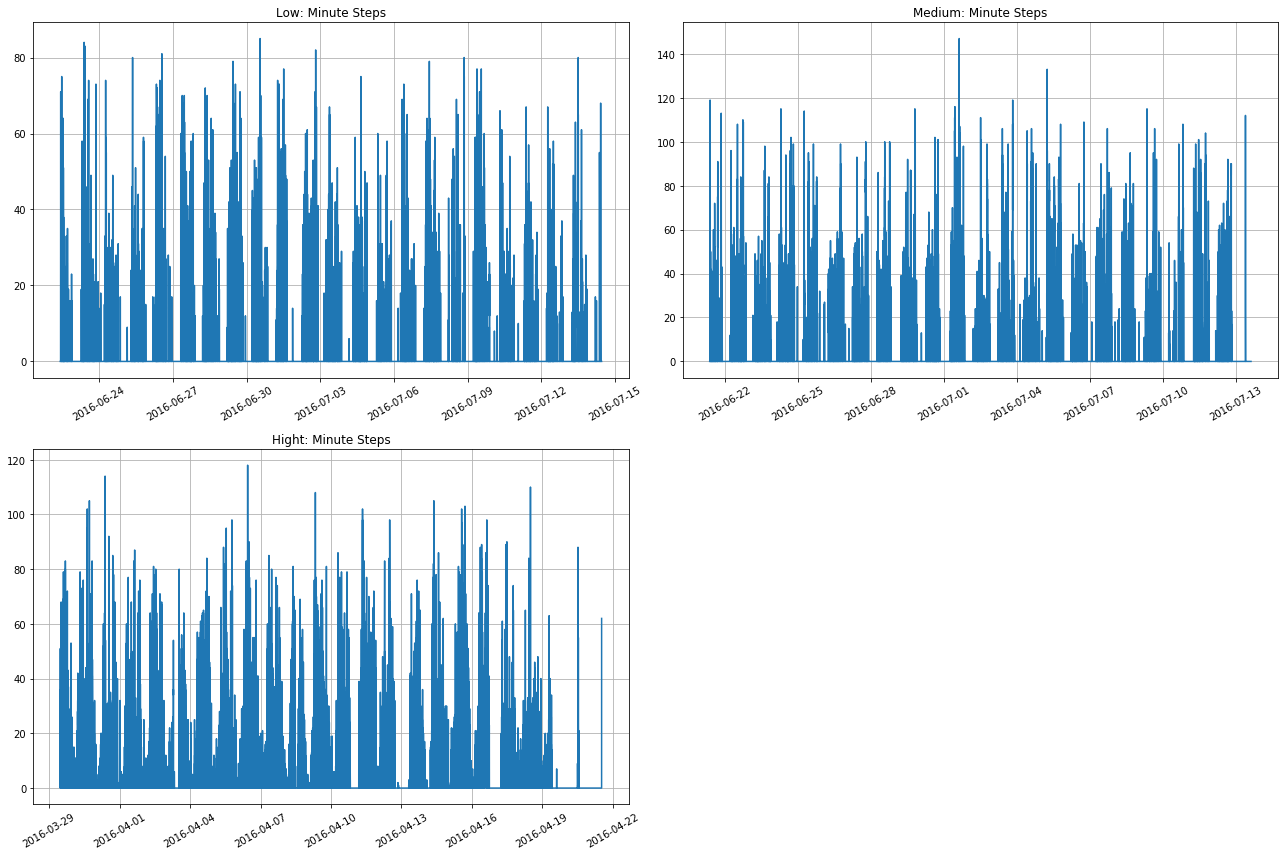

In [17]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow['Steps'], label = "Low: Minute Steps")
ax1.set_title("Low: Minute Steps")
plt.xticks(rotation = 30)
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium['Steps'], label = "Medium: Minute Steps")
ax2.set_title("Medium: Minute Steps")
plt.xticks(rotation = 30)
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh['Steps'], label = "High: Minute Steps")
ax3.set_title("Hight: Minute Steps")
plt.xticks(rotation = 30)
plt.grid()

plt.tight_layout()

## 10-minute Rolling Steps

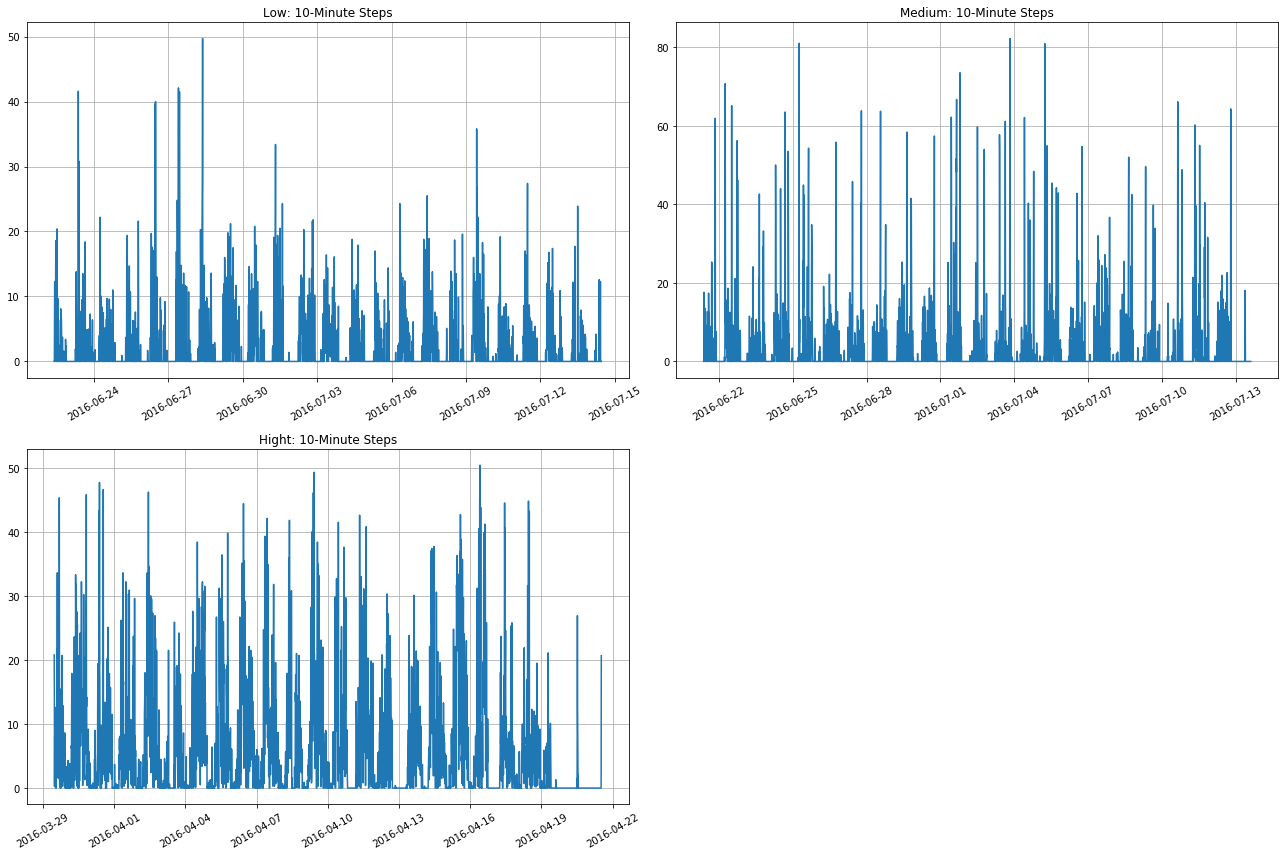

In [45]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow['Steps'].resample('10T').mean(), label = "Low: 10-Minute Steps")
ax1.set_title("Low: 10-Minute Steps")
plt.xticks(rotation = 30)
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium['Steps'].resample('10T').mean(), label = "Medium: 10-Minute Steps")
ax2.set_title("Medium: 10-Minute Steps")
plt.xticks(rotation = 30)
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh['Steps'].resample('10T').mean(), label = "High: 10-Minute Steps")
ax3.set_title("Hight: 10-Minute Steps")
plt.xticks(rotation = 30)
plt.grid()

plt.tight_layout()

## What is the total number of steps for each day?

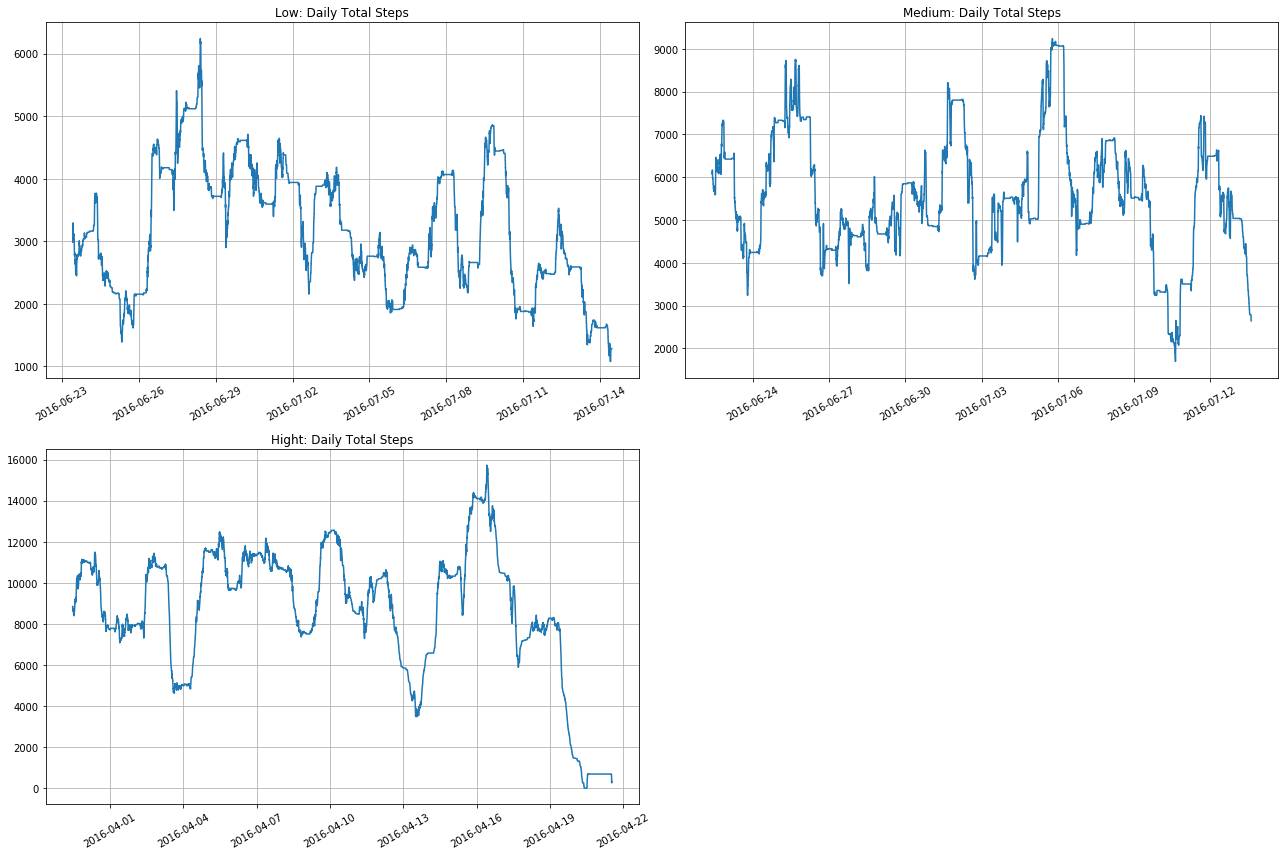

In [16]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow['Steps'].rolling(1440).sum(), label = "Low: Daily Total Steps")
ax1.set_title("Low: Daily Total Steps")
plt.xticks(rotation = 30)
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium['Steps'].rolling(1440).sum(), label = "Medium: Daily Total Steps")
ax2.set_title("Medium: Daily Total Steps")
plt.xticks(rotation = 30)
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh['Steps'].rolling(1440).sum(), label = "High: Daily Total Steps")
ax3.set_title("Hight: Daily Total Steps")
plt.xticks(rotation = 30)
plt.grid()

plt.tight_layout()

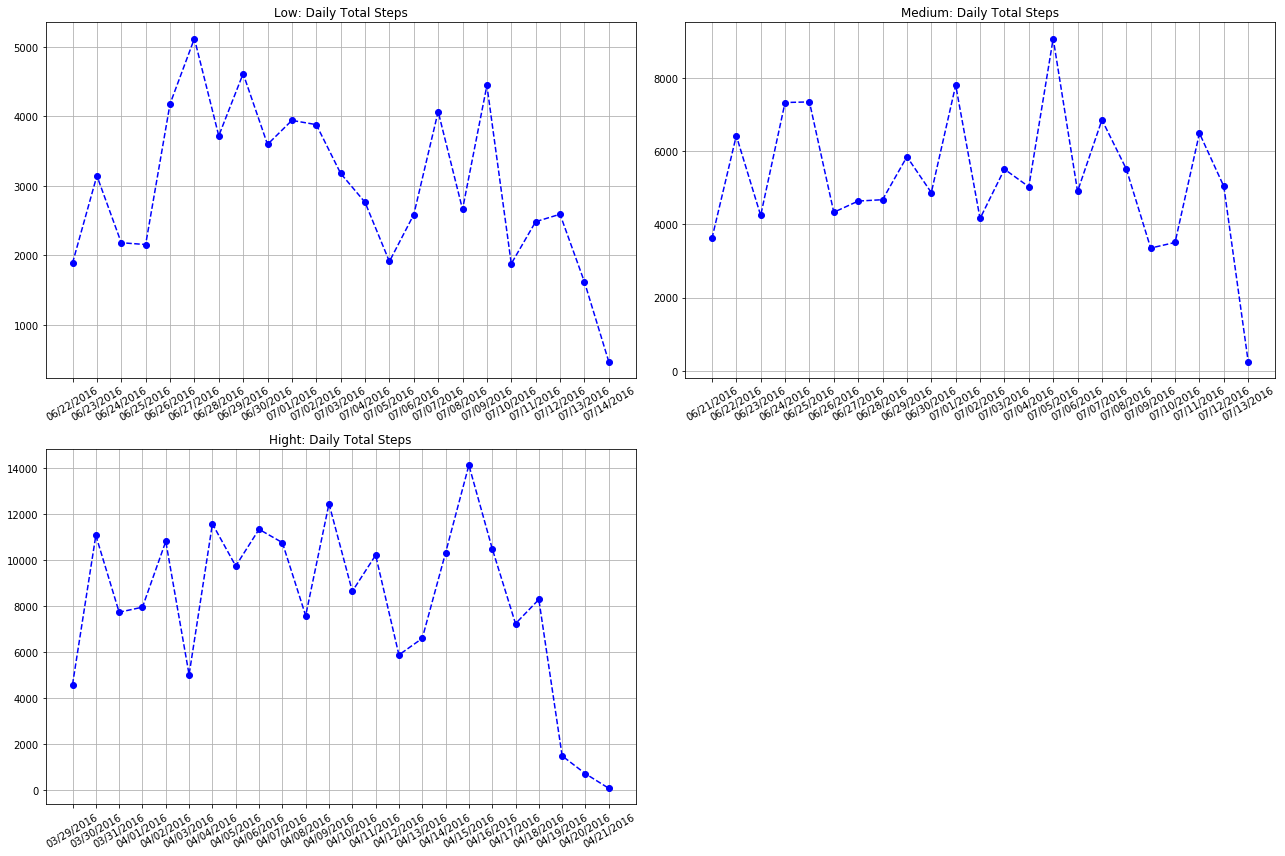

In [84]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow.groupby('ACTDT')['Steps'].sum(), 'bo--', label = "Low: Daily Total Steps")
ax1.set_title("Low: Daily Total Steps")
plt.xticks(rotation = 30)
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium.groupby('ACTDT')['Steps'].sum(), 'bo--', label = "Medium: Daily Total Steps")
ax2.set_title("Medium: Daily Total Steps")
plt.xticks(rotation = 30)
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh.groupby('ACTDT')['Steps'].sum(), 'bo--', label = "High: Daily Total Steps")
ax3.set_title("Hight: Daily Total Steps")
plt.xticks(rotation = 30)
plt.grid()

plt.tight_layout()

## Daily Average Steps

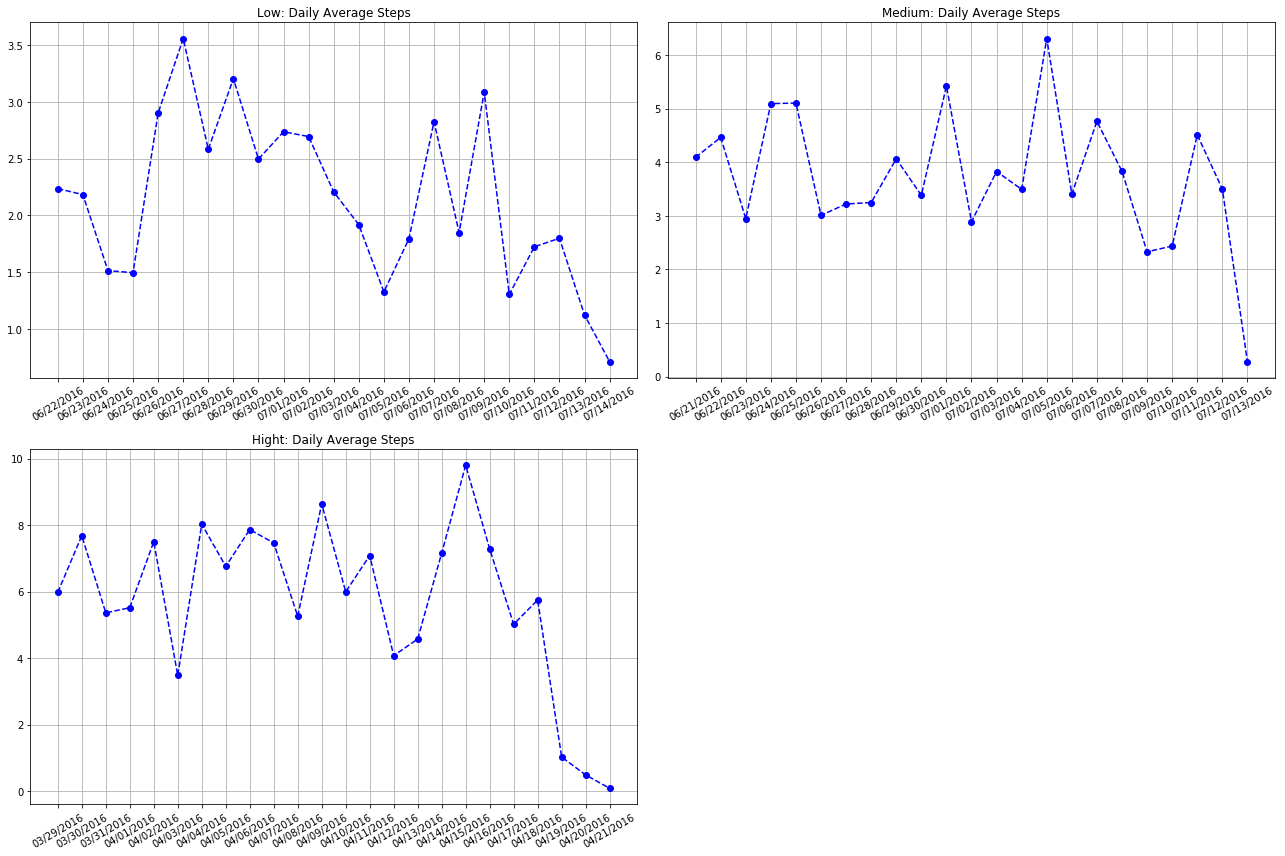

In [39]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow.groupby('ACTDT')['Steps'].mean(), 'bo--', label = "Low: Daily Average Steps")
ax1.set_title("Low: Daily Average Steps")
plt.xticks(rotation = 30)
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium.groupby('ACTDT')['Steps'].mean(), 'bo--', label = "Medium: Daily Average Steps")
ax2.set_title("Medium: Daily Average Steps")
plt.xticks(rotation = 30)
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh.groupby('ACTDT')['Steps'].mean(), 'bo--', label = "High: Daily Average Steps")
ax3.set_title("Hight: Daily Average Steps")
plt.xticks(rotation = 30)
plt.grid()

plt.tight_layout()

## Average Steps over a Day

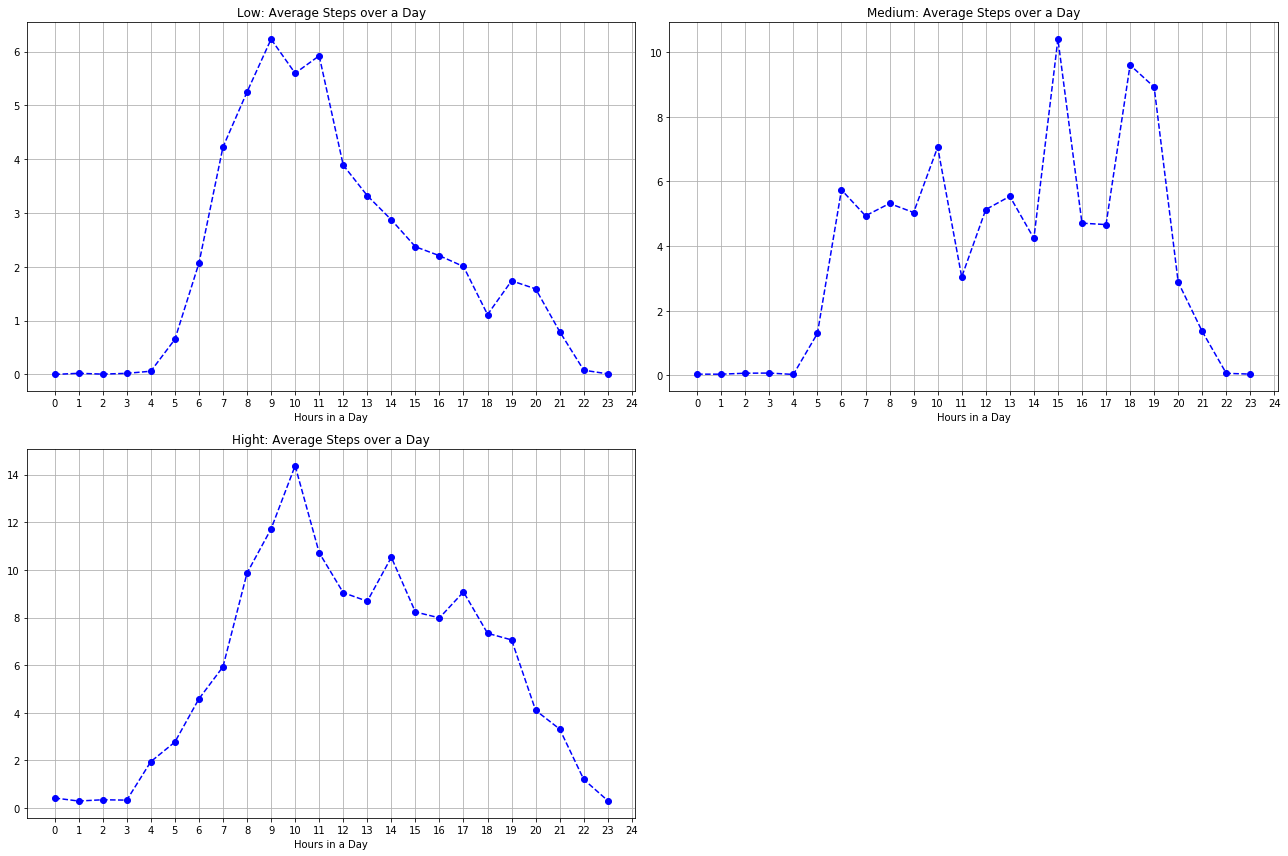

In [42]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow[['Steps', 'Hour']].groupby('Hour').mean(), 'bo--', label = "Low: Average Steps over a Day")
ax1.set_title("Low: Average Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hours in a Day")
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium[['Steps', 'Hour']].groupby('Hour').mean(), 'bo--', label = "Medium: Average Steps over a Day")
ax2.set_title("Medium: Average Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hours in a Day")
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh[['Steps', 'Hour']].groupby('Hour').mean(), 'bo--', label = "High: Average Steps over a Day")
ax3.set_title("Hight: Average Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hours in a Day")
plt.grid()

plt.tight_layout()

## Total Steps over a Day

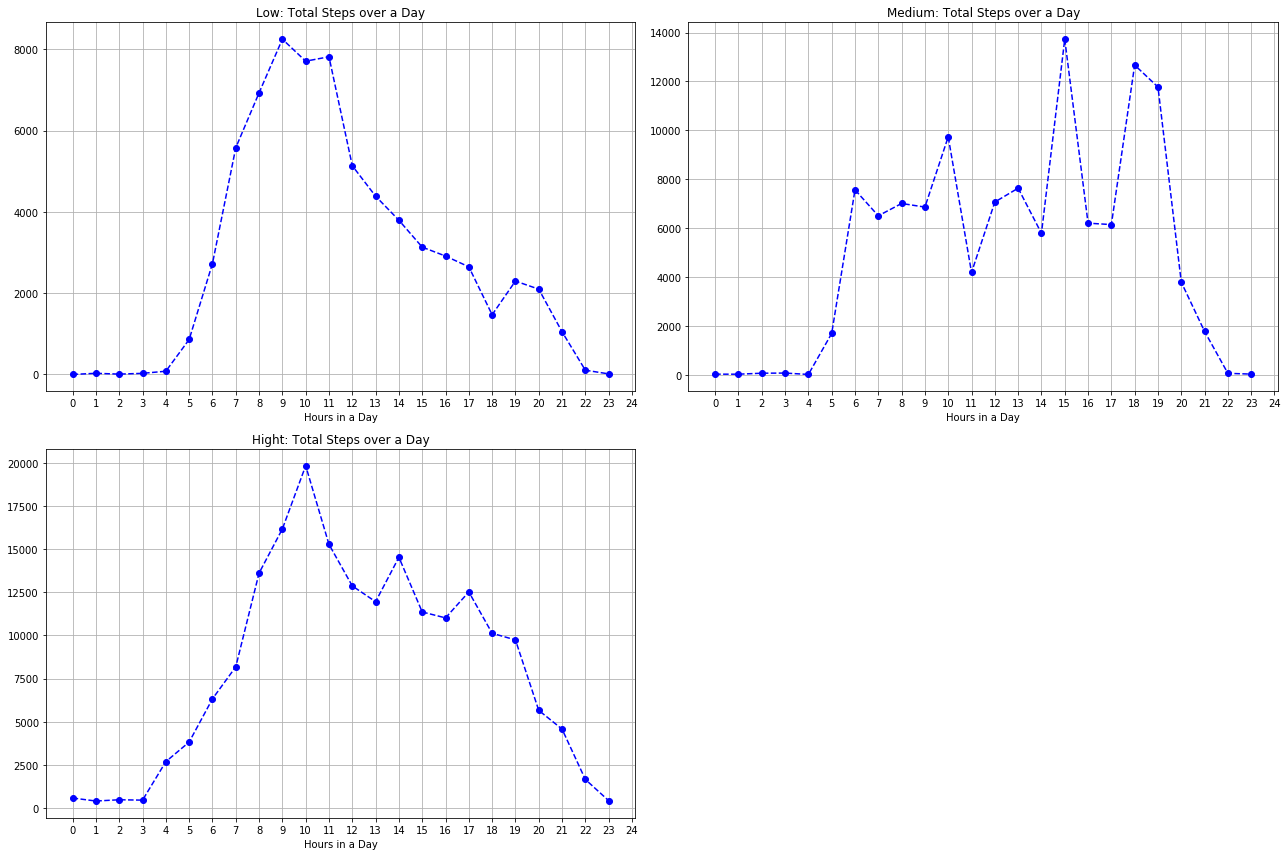

In [44]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
ax1.plot(dflow[['Steps', 'Hour']].groupby('Hour').sum(), 'bo--', label = "Low: Total Steps over a Day")
ax1.set_title("Low: Total Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hours in a Day")
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium[['Steps', 'Hour']].groupby('Hour').sum(), 'bo--', label = "Medium: Total Steps over a Day")
ax2.set_title("Medium: Total Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hours in a Day")
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh[['Steps', 'Hour']].groupby('Hour').sum(), 'bo--', label = "High: Total Steps over a Day")
ax3.set_title("Hight: Total Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hours in a Day")
plt.grid()

plt.tight_layout()

## Group All Steps by Hours

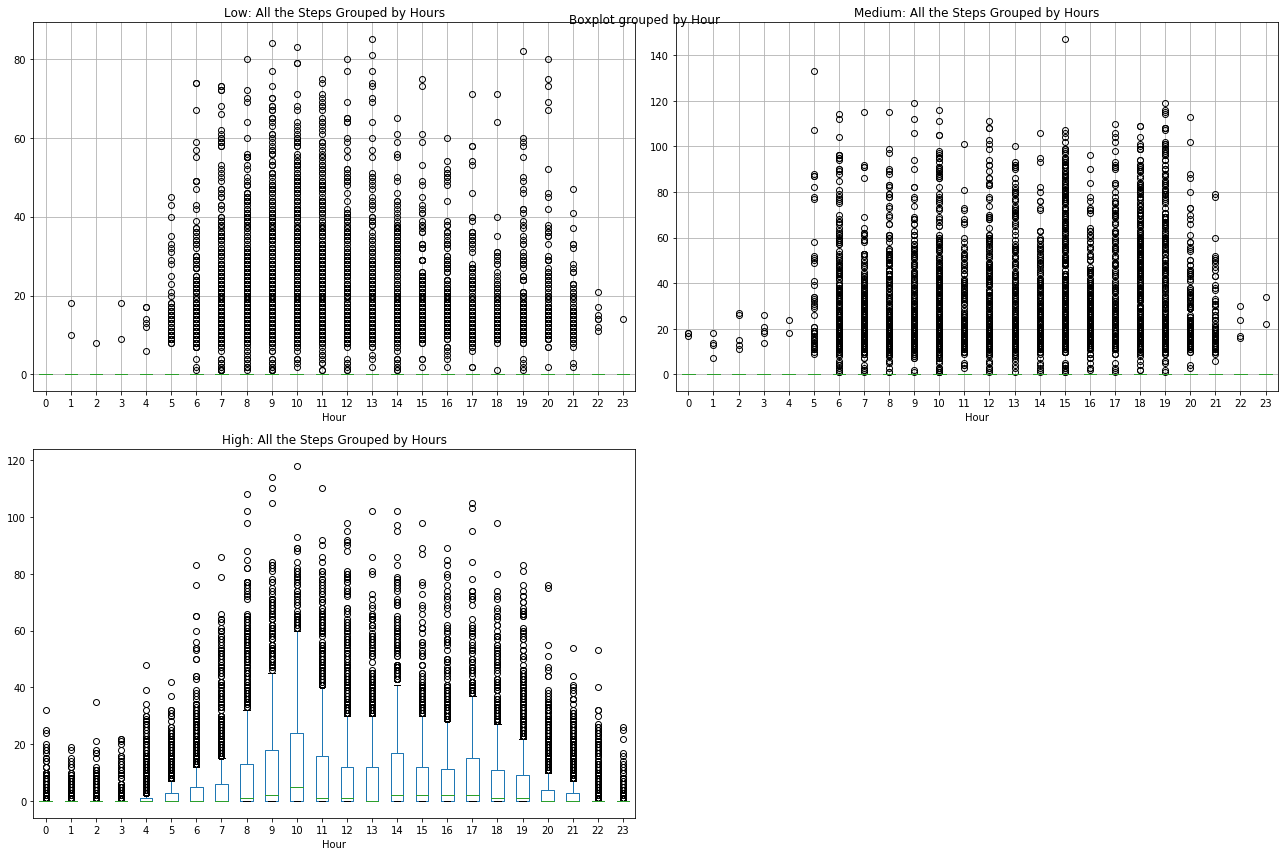

In [48]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
dflow.boxplot(column = 'Steps', by = 'Hour', ax = ax1)
ax1.set_title("Low: All the Steps Grouped by Hours")

ax2 = fig.add_subplot(222)
dfmedium.boxplot(column = 'Steps', by = 'Hour', ax = ax2)
ax2.set_title("Medium: All the Steps Grouped by Hours")

ax3 = fig.add_subplot(223)
dfhigh.boxplot(column = 'Steps', by = 'Hour', ax = ax3)
ax3.set_title("High: All the Steps Grouped by Hours")

plt.grid()

plt.tight_layout()

## Average Activity Time over a Day

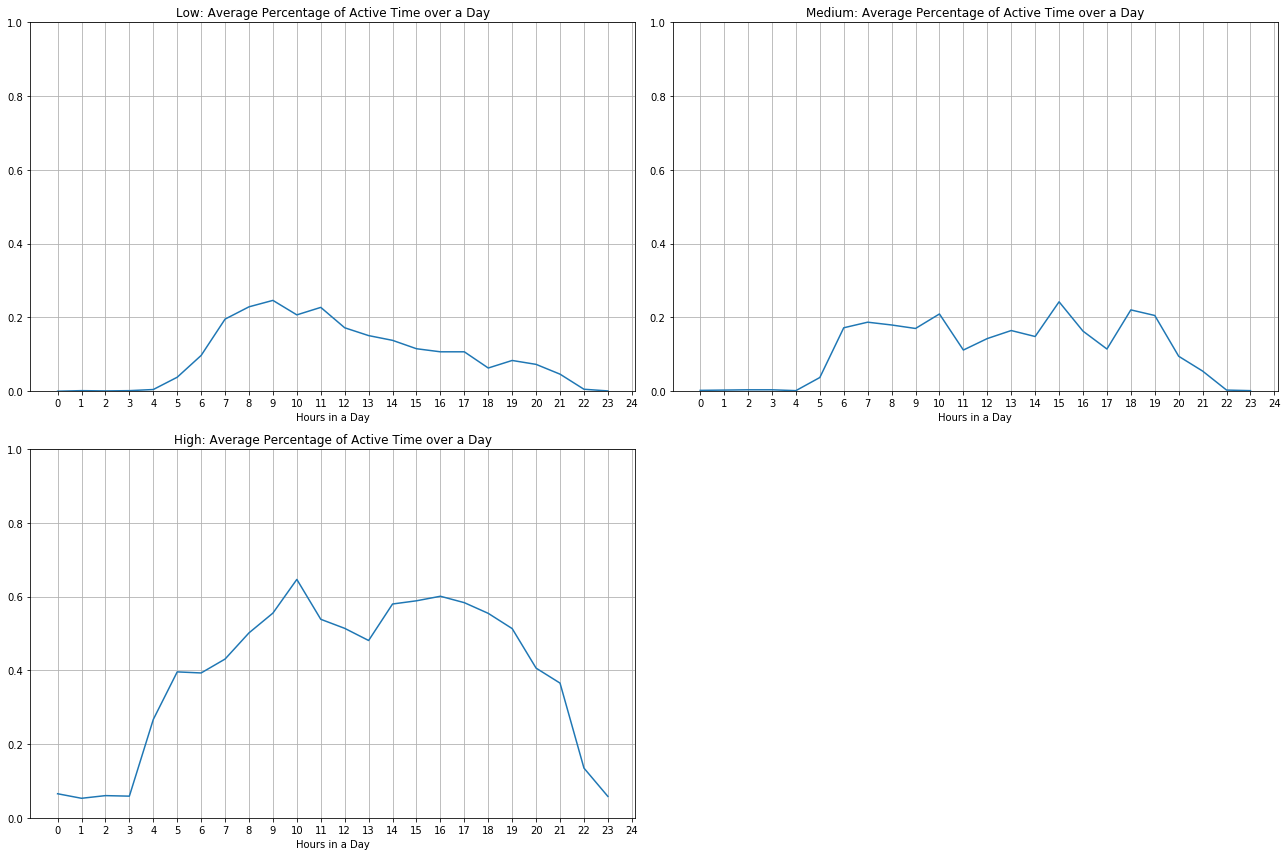

In [52]:
fig = plt.figure(figsize = (18, 12))

zero_perc = lambda g: (g != 0).sum() / g.shape[0]

ax1 = fig.add_subplot(221)
ax1.plot(dflow[['Steps', 'Hour']].groupby("Hour").agg(zero_perc))
plt.ylim((0,1))
plt.title("Low: Average Percentage of Active Time over a Day")
plt.xlabel("Hours in a Day")
plt.xticks(np.arange(25))
plt.grid()

ax2 = fig.add_subplot(222)
ax2.plot(dfmedium[['Steps', 'Hour']].groupby("Hour").agg(zero_perc))
plt.ylim((0,1))
plt.title("Medium: Average Percentage of Active Time over a Day")
plt.xlabel("Hours in a Day")
plt.xticks(np.arange(25))
plt.grid()

ax3 = fig.add_subplot(223)
ax3.plot(dfhigh[['Steps', 'Hour']].groupby("Hour").agg(zero_perc))
plt.ylim((0,1))
plt.title("High: Average Percentage of Active Time over a Day")
plt.xlabel("Hours in a Day")
plt.xticks(np.arange(25))

plt.grid()

plt.tight_layout()

#### Again, this subject was active in every hour. However, in many hour points, the data points look like "outliers". It seems that the subject was inactive in most of the minutes in an hour.

### How do the activities in hours look iike if we factor the data by the wearSens field?

WearSens Specification:
- 0 = Non-Wear
- 1 = Wear
- 2 = Calibrating (the wear sensor calibrates for 10 seconds after it is unplugged from a docking station)
- 3 = Device is plugged into docking station

In [53]:
box_data = dflow[['Steps', 'Hour', 'WearSens']]

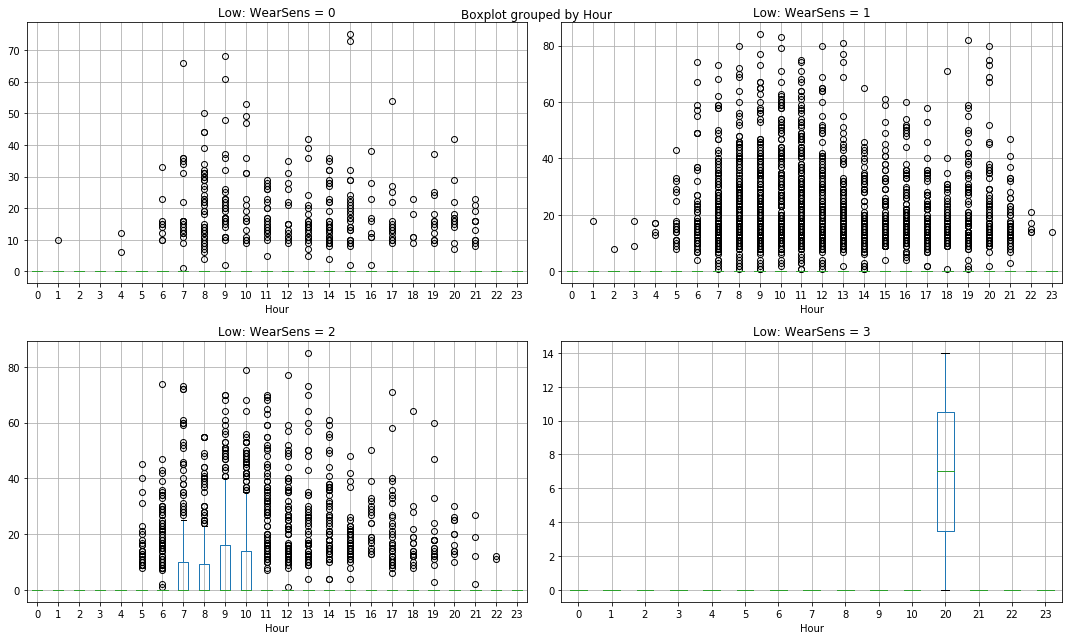

In [54]:
fig = plt.figure(figsize = (15, 9))
ax1 = fig.add_subplot(2, 2, 1)
box_data[box_data['WearSens'] == 0].boxplot(column = 'Steps', by = 'Hour', ax = ax1)
ax1.set_title("Low: WearSens = 0")
ax2 = fig.add_subplot(2, 2, 2)
box_data[box_data['WearSens'] == 1].boxplot(column = 'Steps', by = 'Hour', ax = ax2)
ax3 = fig.add_subplot(2, 2, 3)
box_data[box_data['WearSens'] == 2].boxplot(column = 'Steps', by = 'Hour', ax = ax3)
ax4 = fig.add_subplot(2, 2, 4)
box_data[box_data['WearSens'] == 3].boxplot(column = 'Steps', by = 'Hour', ax = ax4)
ax2.set_title("Low: WearSens = 1")
ax3.set_title("Low: WearSens = 2")
ax4.set_title("Low: WearSens = 3")
plt.tight_layout()

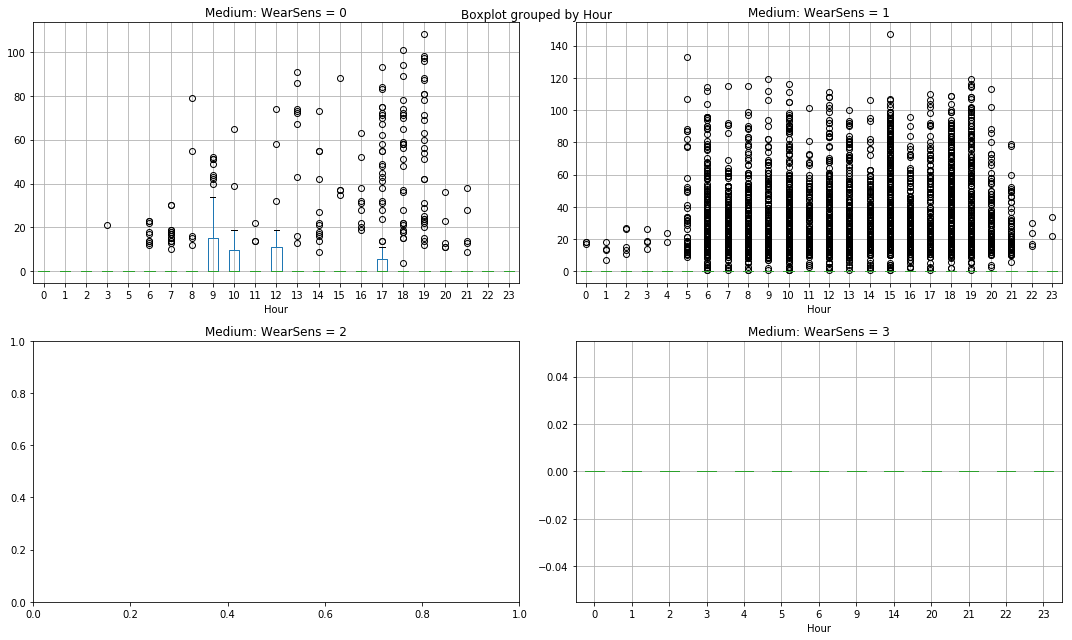

In [56]:
box_data = dfmedium[['Steps', 'Hour', 'WearSens']]
fig = plt.figure(figsize = (15, 9))
ax1 = fig.add_subplot(2, 2, 1)
box_data[box_data['WearSens'] == 0].boxplot(column = 'Steps', by = 'Hour', ax = ax1)
ax1.set_title("Medium: WearSens = 0")
ax2 = fig.add_subplot(2, 2, 2)
box_data[box_data['WearSens'] == 1].boxplot(column = 'Steps', by = 'Hour', ax = ax2)
ax3 = fig.add_subplot(2, 2, 3)
#box_data[box_data['WearSens'] == 2].boxplot(column = 'Steps', by = 'Hour', ax = ax3)
ax4 = fig.add_subplot(2, 2, 4)
box_data[box_data['WearSens'] == 3].boxplot(column = 'Steps', by = 'Hour', ax = ax4)
ax2.set_title("Medium: WearSens = 1")
ax3.set_title("Medium: WearSens = 2")
ax4.set_title("Medium: WearSens = 3")
plt.tight_layout()

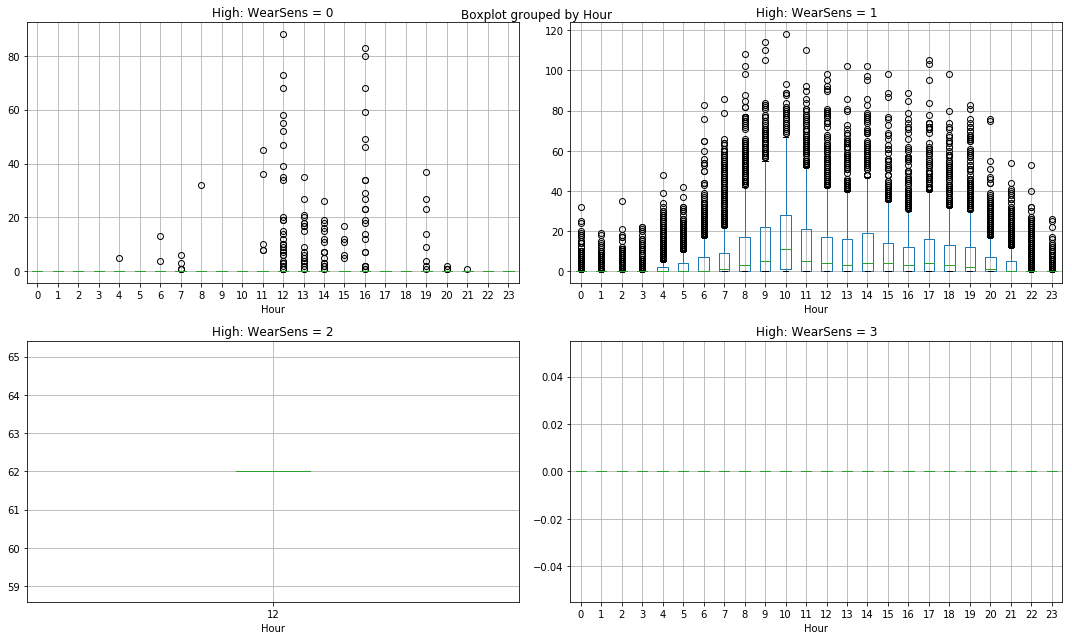

In [57]:
box_data = dfhigh[['Steps', 'Hour', 'WearSens']]
fig = plt.figure(figsize = (15, 9))
ax1 = fig.add_subplot(2, 2, 1)
box_data[box_data['WearSens'] == 0].boxplot(column = 'Steps', by = 'Hour', ax = ax1)
ax1.set_title("High: WearSens = 0")
ax2 = fig.add_subplot(2, 2, 2)
box_data[box_data['WearSens'] == 1].boxplot(column = 'Steps', by = 'Hour', ax = ax2)
ax3 = fig.add_subplot(2, 2, 3)
box_data[box_data['WearSens'] == 2].boxplot(column = 'Steps', by = 'Hour', ax = ax3)
ax4 = fig.add_subplot(2, 2, 4)
box_data[box_data['WearSens'] == 3].boxplot(column = 'Steps', by = 'Hour', ax = ax4)
ax2.set_title("High: WearSens = 1")
ax3.set_title("High: WearSens = 2")
ax4.set_title("High: WearSens = 3")
plt.tight_layout()

## How long do they wear the device?

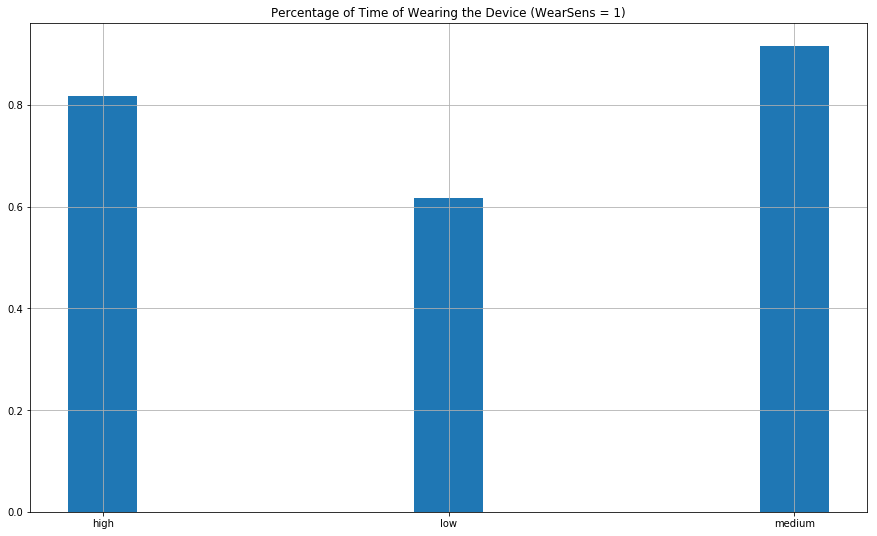

In [81]:
lowwear = dflow['WearSens'].value_counts()[1] / dflow.shape[0]
mediumwear = dfmedium['WearSens'].value_counts()[1] / dfmedium.shape[0]
highwear = dfhigh['WearSens'].value_counts()[1] / dfhigh.shape[0]
plt.bar(['low', 'medium', 'high'], [lowwear, mediumwear, highwear], width = 0.2)
plt.title("Percentage of Time of Wearing the Device (WearSens = 1)")
plt.grid()

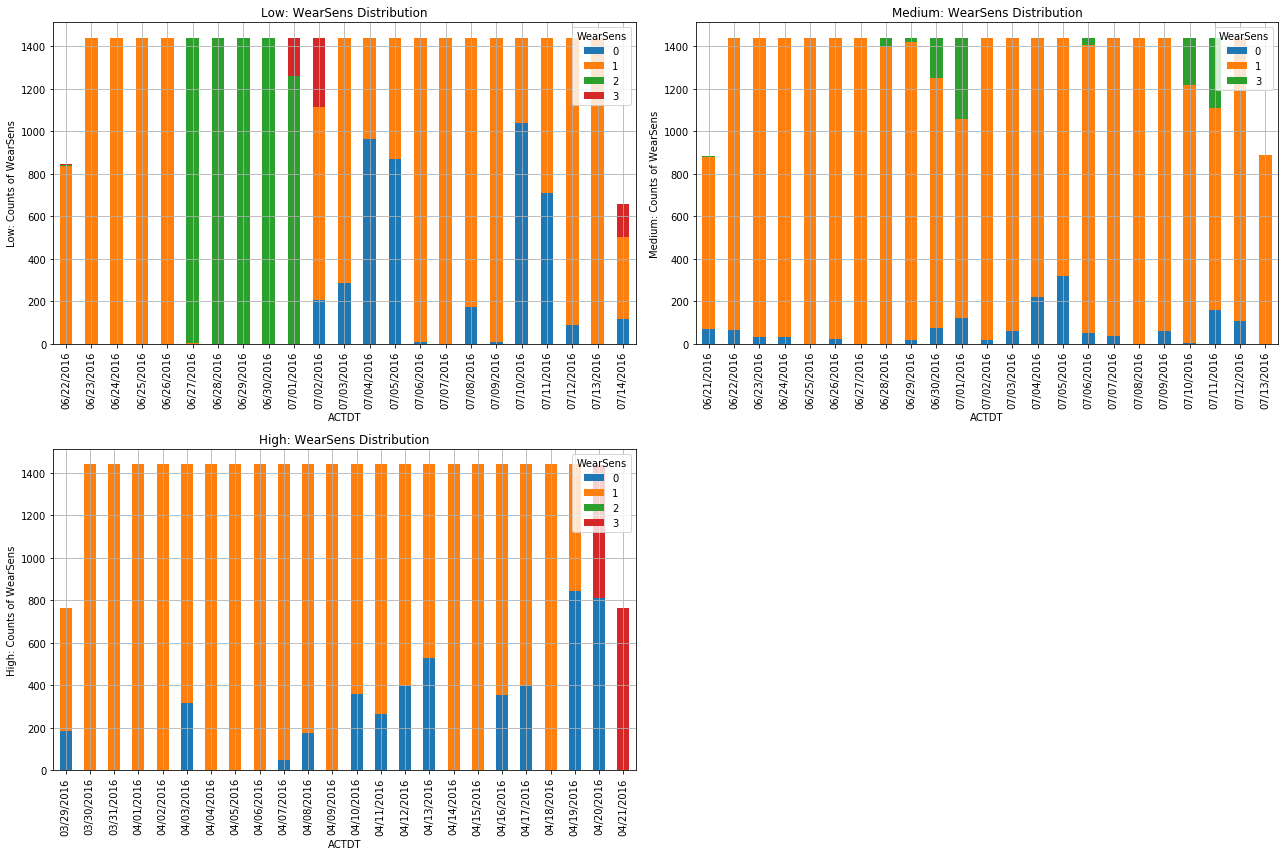

In [93]:
fig = plt.figure(figsize = (18, 12))

ax1 = fig.add_subplot(221)
lowwearsens = dflow.groupby(['ACTDT', 'WearSens']).size()
lowwearsens.unstack().plot(kind = 'bar', stacked = True, ax = ax1)
plt.ylabel("Low: Counts of WearSens")
plt.title("Low: WearSens Distribution")
plt.grid()

ax2 = fig.add_subplot(222)
mediumwearsens = dfmedium.groupby(['ACTDT', 'WearSens']).size()
mediumwearsens.unstack().plot(kind = 'bar', stacked = True, ax = ax2)
plt.ylabel("Medium: Counts of WearSens")
plt.title("Medium: WearSens Distribution")
plt.grid()

ax3 = fig.add_subplot(223)
highwearsens = dfhigh.groupby(['ACTDT', 'WearSens']).size()
highwearsens.unstack().plot(kind = 'bar', stacked = True, ax =  ax3)
plt.ylabel("High: Counts of WearSens")
plt.title("High: WearSens Distribution")
plt.grid()

plt.tight_layout()


## How do the activity patterns look like in terms of weekdays?

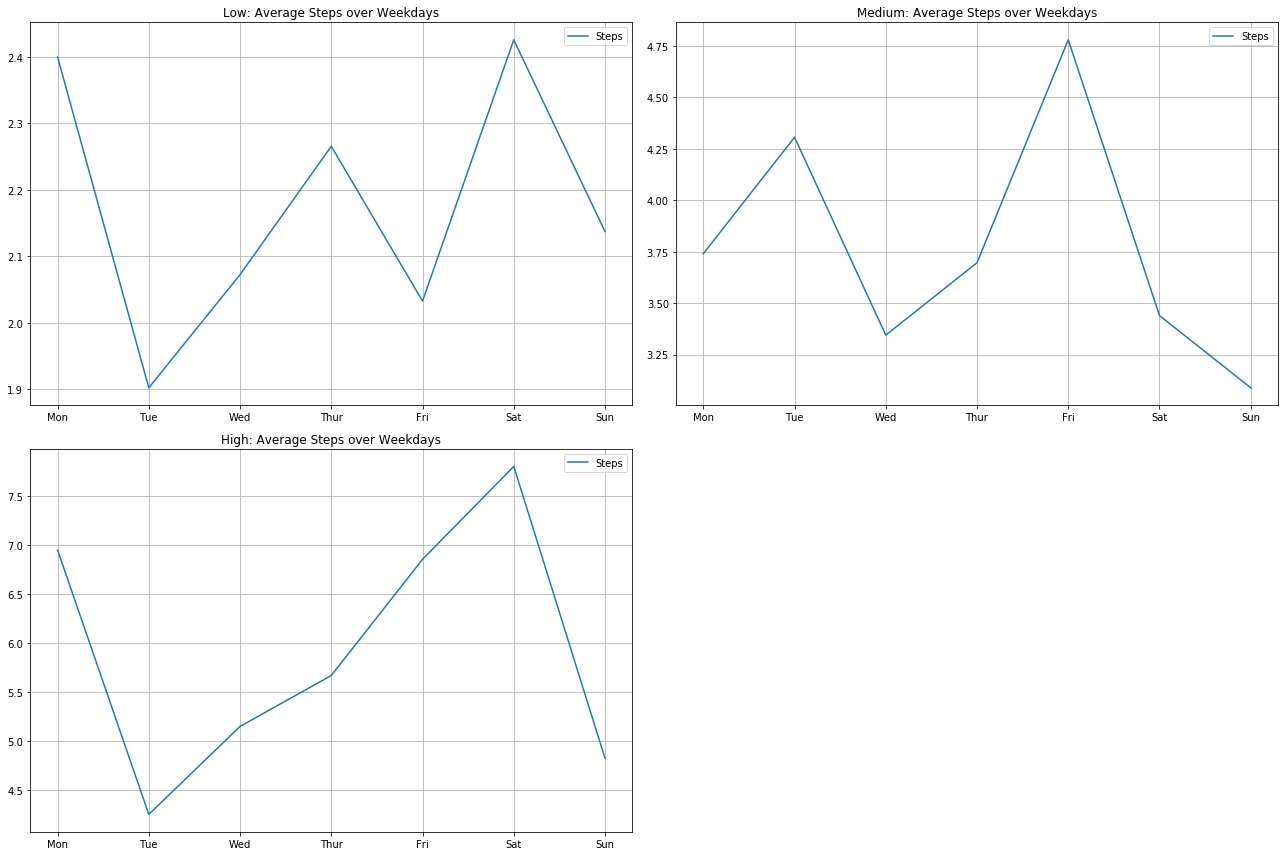

In [71]:
fig = plt.figure(figsize = (18, 12))

xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ax1 = fig.add_subplot(221)
by_weekday = dflow[['Steps']].groupby(dflow.index.dayofweek).mean()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot(ax = ax1)
plt.xticks([0,1,2,3,4,5,6], xticks)
#plt.ylabel("Low: Average Steps")
plt.title("Low: Average Steps over Weekdays")
plt.grid()

ax2 = fig.add_subplot(222)
by_weekday = dfmedium[['Steps']].groupby(dfmedium.index.dayofweek).mean()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot(ax = ax2)
plt.xticks([0,1,2,3,4,5,6], xticks)
#plt.ylabel("Medium: Average Steps")
plt.title("Medium: Average Steps over Weekdays")
plt.grid()

ax3 = fig.add_subplot(223)
by_weekday = dfhigh[['Steps']].groupby(dfhigh.index.dayofweek).mean()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot(ax = ax3)
plt.xticks([0,1,2,3,4,5,6], xticks)
#plt.ylabel("High: Average Steps")
plt.title("High: Average Steps over Weekdays")
plt.grid()

plt.tight_layout()


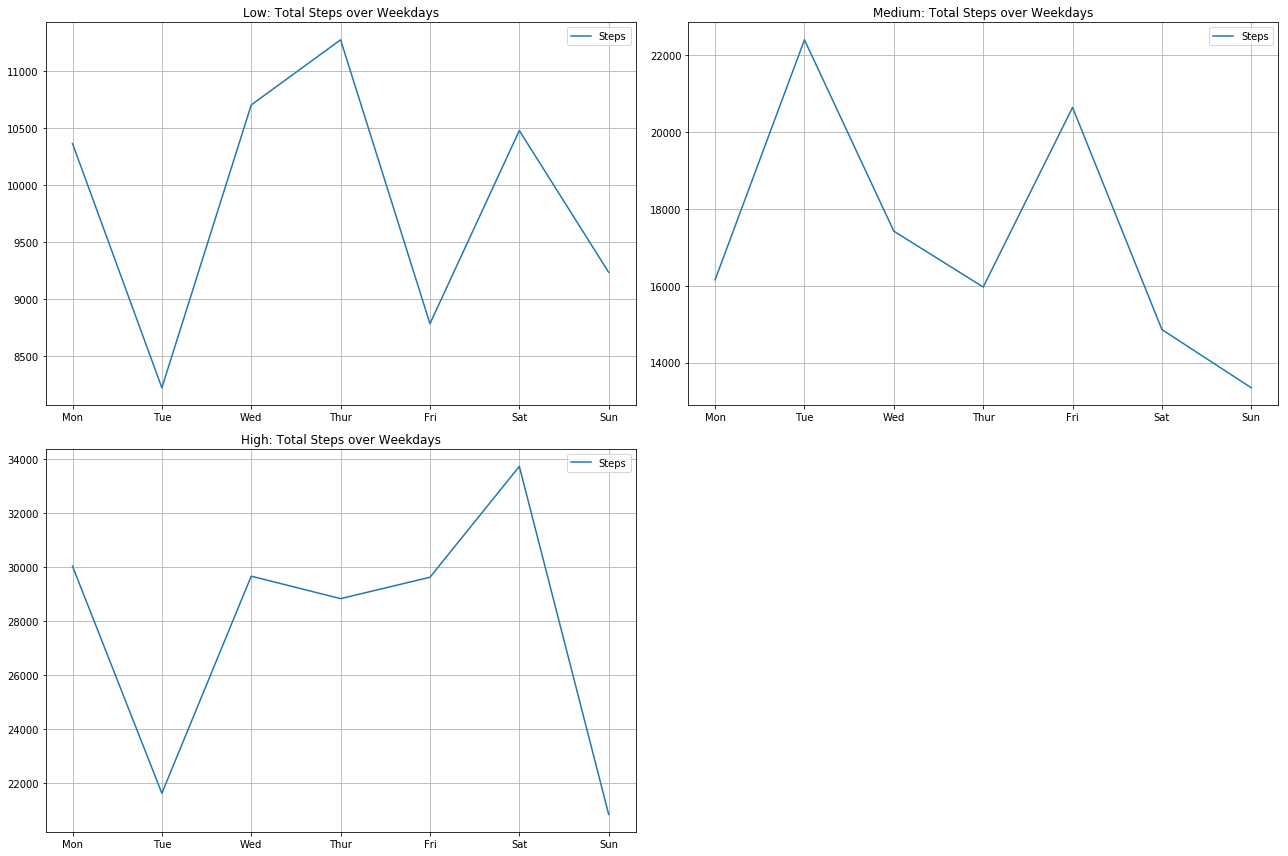

In [72]:
fig = plt.figure(figsize = (18, 12))

xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ax1 = fig.add_subplot(221)
by_weekday = dflow[['Steps']].groupby(dflow.index.dayofweek).sum()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot(ax = ax1)
plt.xticks([0,1,2,3,4,5,6], xticks)
#plt.ylabel("Low: Average Steps")
plt.title("Low: Total Steps over Weekdays")
plt.grid()

ax2 = fig.add_subplot(222)
by_weekday = dfmedium[['Steps']].groupby(dfmedium.index.dayofweek).sum()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot(ax = ax2)
plt.xticks([0,1,2,3,4,5,6], xticks)
#plt.ylabel("Medium: Average Steps")
plt.title("Medium: Total Steps over Weekdays")
plt.grid()

ax3 = fig.add_subplot(223)
by_weekday = dfhigh[['Steps']].groupby(dfhigh.index.dayofweek).sum()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot(ax = ax3)
plt.xticks([0,1,2,3,4,5,6], xticks)
#plt.ylabel("High: Average Steps")
plt.title("High: Total Steps over Weekdays")
plt.grid()

plt.tight_layout()


### How do the activity patterns look like in weekdays and weekend?

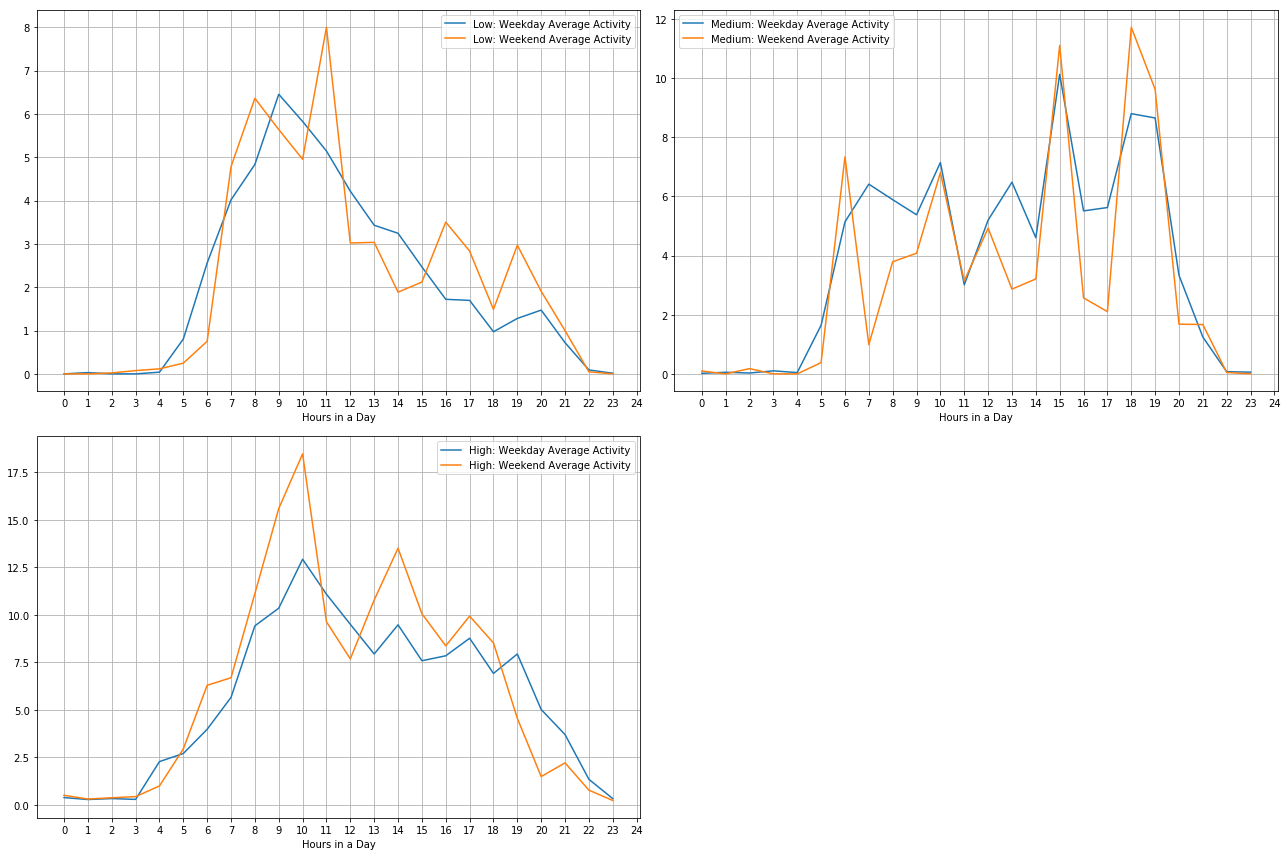

In [76]:
fig = plt.figure(figsize = (18, 12))

weekend = np.where(dflow.index.weekday < 5, 'weekday', 'weekend')
ax1 = fig.add_subplot(221)
by_time = dflow.groupby([weekend, 'Hour']).mean()
by_time.loc['weekday']['Steps'].plot(label = 'Low: Weekday Average Activity', ax = ax1)
by_time.loc['weekend']['Steps'].plot(label = "Low: Weekend Average Activity", ax = ax1)
plt.legend()
plt.xlabel("Hours in a Day")
#plt.ylabel("Total Steps")
plt.xticks(np.arange(25))
plt.grid()

ax2 = fig.add_subplot(222)
weekend = np.where(dfmedium.index.weekday < 5, 'weekday', 'weekend')
by_time = dfmedium.groupby([weekend, 'Hour']).mean()
by_time.loc['weekday']['Steps'].plot(label = 'Medium: Weekday Average Activity', ax  = ax2)
by_time.loc['weekend']['Steps'].plot(label = "Medium: Weekend Average Activity", ax = ax2)
plt.legend()
plt.xlabel("Hours in a Day")
#plt.ylabel("Total Steps")
plt.xticks(np.arange(25))
plt.grid()

ax3 = fig.add_subplot(223)
weekend = np.where(dfhigh.index.weekday < 5, 'weekday', 'weekend')
by_time = dfhigh.groupby([weekend, 'Hour']).mean()
by_time.loc['weekday']['Steps'].plot(label = 'High: Weekday Average Activity', ax =  ax3)
by_time.loc['weekend']['Steps'].plot(label = "High: Weekend Average Activity", ax = ax3)
plt.legend()
plt.xlabel("Hours in a Day")
#plt.ylabel("Total Steps")
plt.xticks(np.arange(25))
plt.grid()

plt.tight_layout()

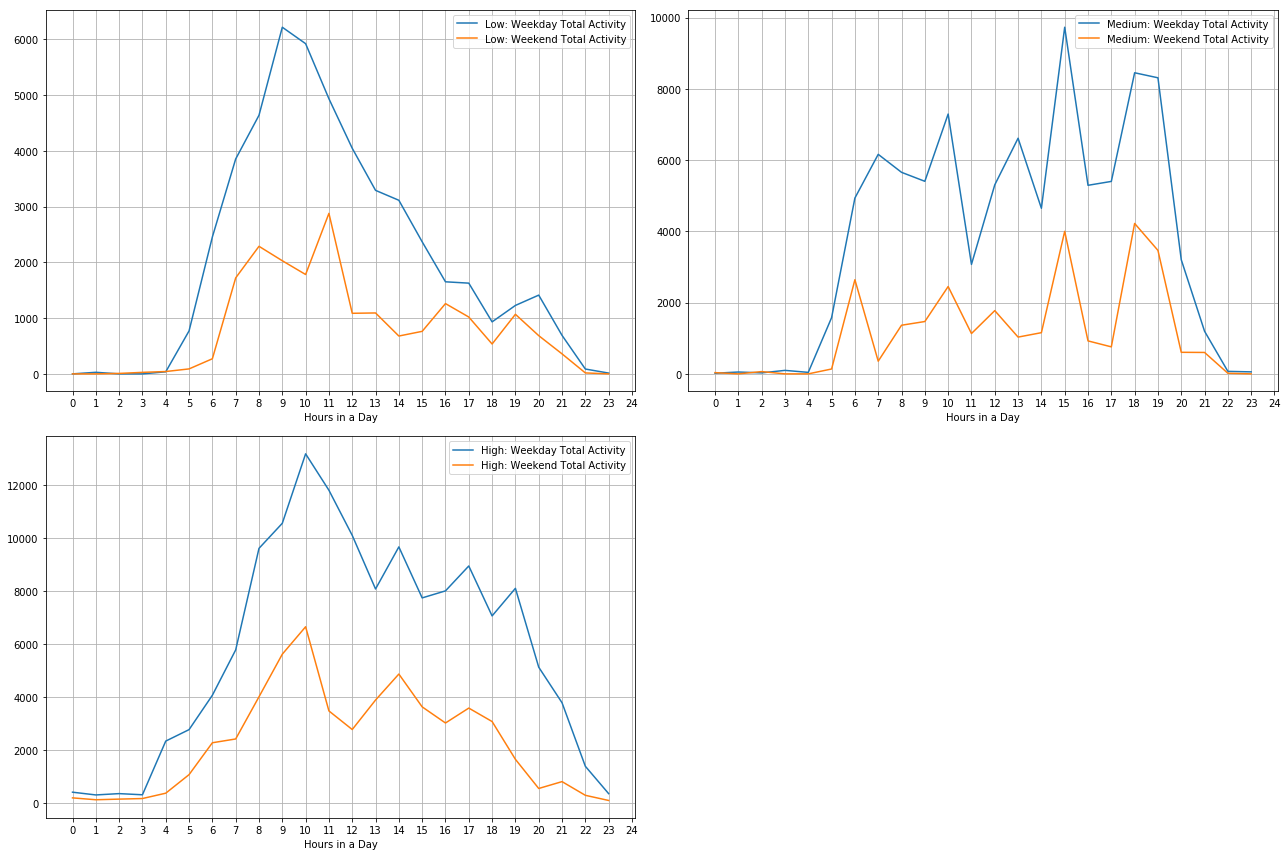

In [75]:
fig = plt.figure(figsize = (18, 12))

weekend = np.where(dflow.index.weekday < 5, 'weekday', 'weekend')
ax1 = fig.add_subplot(221)
by_time = dflow.groupby([weekend, 'Hour']).sum()
by_time.loc['weekday']['Steps'].plot(label = 'Low: Weekday Total Activity', ax = ax1)
by_time.loc['weekend']['Steps'].plot(label = "Low: Weekend Total Activity", ax = ax1)
plt.legend()
plt.xlabel("Hours in a Day")
#plt.ylabel("Total Steps")
plt.xticks(np.arange(25))
plt.grid()

ax2 = fig.add_subplot(222)
weekend = np.where(dfmedium.index.weekday < 5, 'weekday', 'weekend')
by_time = dfmedium.groupby([weekend, 'Hour']).sum()
by_time.loc['weekday']['Steps'].plot(label = 'Medium: Weekday Total Activity', ax  = ax2)
by_time.loc['weekend']['Steps'].plot(label = "Medium: Weekend Total Activity", ax = ax2)
plt.legend()
plt.xlabel("Hours in a Day")
#plt.ylabel("Total Steps")
plt.xticks(np.arange(25))
plt.grid()

ax3 = fig.add_subplot(223)
weekend = np.where(dfhigh.index.weekday < 5, 'weekday', 'weekend')
by_time = dfhigh.groupby([weekend, 'Hour']).sum()
by_time.loc['weekday']['Steps'].plot(label = 'High: Weekday Total Activity', ax =  ax3)
by_time.loc['weekend']['Steps'].plot(label = "High: Weekend Total Activity", ax = ax3)
plt.legend()
plt.xlabel("Hours in a Day")
#plt.ylabel("Total Steps")
plt.xticks(np.arange(25))
plt.grid()

plt.tight_layout()